## Trabalho T2 sobre Sistemas Lineares

### Métodos Numéricos Computacionais
### UFSM - 2º Semestre de 2023

**Nome dos componentes do grupo:** Augusto Kist Lunardi, Felipe da Cas Becker e Jonathan Weber Nogueira.


**Questão 1:**
Resolva o seguinte sistema $Ax=b$ usando decomposição LU mostrando as matrizes triangulares L e U. 

$$ \begin{cases} 
	         6.1x_1 + 0.23x_2 + 1.3x_3 +1.2x_4 + 0.11x_5 = 19.52\\ 
	         0.28x_1  + 8.18x_2  + 1.01x_3 +3x_4 + 3.12x_5= 83.15\\
	         0.5x_1 + 1.78x_2 + 15.2x_3 + 4.2x_4 +8.1x_5= -22.14\\
	         4.2x_1 + 5.3x_2 + 1.8x_3 +29.0x_4 +7.51x_5 = -27.28\\
	         0.2x_1 + 1.9x_2 + 4.86x_3 +4.3x_4 +20.1x_5  = 21.87
	         \end{cases} $$

Então, resolva esse mesmo sistema usando eliminação de Gauss, e compare os coeficientes da matriz do sistema triangular obtido com a matriz U. Comente o que você observou. 

In [7]:
import numpy as np

def solve_L(L,b):
    x = np.copy(b)
    for i in range(len(b)):
        x[i] = (b[i] - sum(L[i, 0:i]*x[0:i]))/L[i,i]
    return x

def solve_U(U, b):
    n = len(b)
    x = np.empty(n)
    for i in range(n - 1, -1, -1):
        sum_term = np.sum(U[i, i + 1:] * x[i + 1:])
        x[i] = (b[i] - sum_term) / U[i, i]
    return x

def fatora_LU(A):
    n = len(A)
    U = np.zeros((n, n))
    L = np.identity(n)
    for m in range(n):
        for j in range(m, n):
            U[m, j] = A[m, j] - np.sum(L[m, 0:m] * U[0:m, j])
        for i in range(m + 1, n):
            L[i, m] = (A[i, m] - np.sum(L[i, 0:m] * U[0:m, m])) / U[m, m]
    return L, U

A = np.array([[6.1, 0.23, 1.3, 1.2, 0.11],
             [0.28, 8.18, 1.01, 3.0, 3.12],
             [0.5, 1.78, 15.2, 4.2, 8.1],
             [4.2, 5.3, 1.8, 29.0, 7.51],
             [0.2, 1.9, 4.86, 4.3, 20.1]])

b = np.array([19.52, 83.15, -22.14, -27.28, 21.87])

np.set_printoptions(precision=4)

L, U = fatora_LU(A)
y = solve_L(L,b)
x = solve_U(U, y)

print("Matriz L:")
print(L)
print("\nMatriz U:")
print(U)
print("A solução é", x)
print("\n")

def triangulariza(M):
    n = len(M)
    for k in range(n-1):
        for i in range(k,n-1):
            m = M[i+1,k]/M[k,k]
            M[i+1] = M[i+1]-m*M[k]
    return (M)

M = np.array([[6.1, 0.23, 1.3, 1.2, 0.11, 19.52],
             [0.28, 8.18, 1.01, 3.0, 3.12, 83.15],
             [0.5, 1.78, 15.2, 4.2, 8.1, -22.14],
             [4.2, 5.3, 1.8, 29.0, 7.51, -27.28],
             [0.2, 1.9, 4.86, 4.3, 20.1, 21.87]])
M = triangulariza(M)
print("Matriz do sistema triangular")
print(M)

n = len(M)
Z = M[0:n+1,n:n+1]       
Y = M[0:n+1,0:n]  

solution = solve_U(Y, Z)

print("Solução do sistema com método de Gauss:", solution)

Matriz L:
[[1.     0.     0.     0.     0.    ]
 [0.0459 1.     0.     0.     0.    ]
 [0.082  0.2156 1.     0.     0.    ]
 [0.6885 0.6294 0.0206 1.     0.    ]
 [0.0328 0.2317 0.3088 0.0955 1.    ]]

Matriz U:
[[ 6.1     0.23    1.3     1.2     0.11  ]
 [ 0.      8.1694  0.9503  2.9449  3.115 ]
 [ 0.      0.     14.8886  3.4668  7.4195]
 [ 0.      0.      0.     26.2489  5.3209]
 [ 0.      0.      0.      0.     16.5755]]
A solução é [ 4.0542 11.1902 -2.6187 -3.7813  1.432 ]


Matriz do sistema triangular
[[  6.1      0.23     1.3      1.2      0.11    19.52  ]
 [  0.       8.1694   0.9503   2.9449   3.115   82.254 ]
 [  0.       0.      14.8886   3.4668   7.4195 -41.4721]
 [  0.       0.       0.      26.2489   5.3209 -91.634 ]
 [  0.       0.       0.       0.      16.5755  23.7367]]
Solução do sistema com método de Gauss: [ 4.0542 11.1902 -2.6187 -3.7813  1.432 ]


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_6388\4070474889.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = (b[i] - sum_term) / U[i, i]


Como os coeficientes encontrados foram iguais, a única observação é o uso dos métodos:

- O método de decomposição LU envolve a fatoração da matriz de coeficientes em duas matrizes triangulares (L e U) antes de resolver o sistema. Isso pode ser útil quando você precisa resolver o mesmo sistema com várias fontes diferentes (ou seja, diferentes vetores b) sem refazer a fatoração LU.

- O método de eliminação gaussiana trabalha diretamente com a matriz estendida e a transforma em uma matriz triangular superior. Não envolve uma decomposição separada e é mais eficiente em termos de memória quando você precisa resolver o sistema apenas uma vez.

**Questão 2:**
Utilize o processo de eliminação para obter a inversa da matriz dos coeficientes do sistema linear dado. Então, use a matriz inversa para obter a solução do sistema.

$$ \begin{cases} 
    12.1756 x_1 + 4.0231 x_2 - 2.1732 x_3 + 5.1967 x_4 = 17.1020\\ 
   -4.0231 x_1 + 6.0030 x_2              + 1.1973 x_4 = -6.1593\\
   -1.0000 x_1 - 5.2107 x_2 + 11.1111 x_3              =  3.0004\\
	6.0235 x_1 + 7.0000 x_2 +            - 14.1561 x_4 =  0.0000
\end{cases} $$

Agora, se possível, utilize algum método iterativo para resolver esse sistema, teste a convergência e mostre o erro para as dez primeiras iterações. Comente o que você observou.

In [8]:
import numpy as np

A = np.array([[12.1756, 4.0231, -2.1732, 5.1967], 
              [-4.0231, 6.0030, 0.0000, 1.1973], 
              [-1.0000, -5.2107, 11.1111, 0.0000], 
              [6.0235, 7.0000, 0.0000, -14.1561]])

b = np.array([17.1020, -6.1593, 3.0004, 0.0000])

def gaussJordan(M):
    n = len(M)
    for k in range(n):
        M[k] = M[k] / M[k, k]
        for i in range(n):
            if i != k:
                M[i] = M[i] - M[i, k] * M[k]
    return M

I = np.identity(len(A))
M = np.concatenate((A,I), axis=1)

M = gaussJordan(M)

Ainv = M[:, 4:]
np.set_printoptions(precision=4)
print("Matriz Inversa:\n", Ainv)

x = np.dot(Ainv, b)
print ("\nSolução do sistema utilizando a matriz inversa obtida a partir do processo de eliminação:  ", np.round(x,4))
print("\nAgora utilizando o método iterativo de Jacobi-Richardson\n")


x = np.array([0, 0, 0, 0])
x_ant = x.copy()

n = len(A)
H = A.copy()
g = b.copy()
err = 10.0

for i in range(n):
    H[i] = -A[i]/A[i][i]
    g[i] = b[i]/A[i,i]
    
H = H + np.identity(4)

norm_H = np.linalg.norm(H, ord=2)  
print("Norma de H (para verificar a convergência): ", norm_H) #Já que a norma é menor do que 1 irá convergir para a solução 
print("")

p = 0

while err>0.0001:
    x = np.dot(H,x)+g
    err = abs(max(x-x_ant)/max(x))
    x_ant = x
    if (p < 10):
        print("Erro na iteração", p + 1,":", err)
        p += 1
print("\nSolução do sistema utilizando o método iterativo de Jacobi-Richardson:  ", x)

Matriz Inversa:
 [[ 0.0583 -0.0492  0.0114  0.0172]
 [ 0.031   0.1254  0.0061  0.022 ]
 [ 0.0198  0.0544  0.0939  0.0119]
 [ 0.0401  0.041   0.0079 -0.0524]]

Solução do sistema utilizando a matriz inversa obtida a partir do processo de eliminação:   [ 1.3341 -0.2232  0.2855  0.4573]

Agora utilizando o método iterativo de Jacobi-Richardson

Norma de H (para verificar a convergência):  0.9287011909178777

Erro na iteração 1 : 1.0
Erro na iteração 2 : 0.5253521113270332
Erro na iteração 3 : 0.4570565827610299
Erro na iteração 4 : 0.06823506840879451
Erro na iteração 5 : 0.1326664414047381
Erro na iteração 6 : 0.12289061745722926
Erro na iteração 7 : 0.11014394208094563
Erro na iteração 8 : 0.032587794020062934
Erro na iteração 9 : 0.016978668598373197
Erro na iteração 10 : 0.031215031057151277

Solução do sistema utilizando o método iterativo de Jacobi-Richardson:   [ 1.3336 -0.2233  0.2859  0.4577]


- O Método de Eliminação Gauss-Jordan produz a matriz inversa de A e a solução exata do sistema linear.
- O Método Iterativo de Jacobi-Richardson convergiu para uma solução aproximada do sistema linear após algumas iterações. O erro entre iterações consecutivas é monitorado, e o método continua até que o erro seja menor que 0.0001. Para as 10 primeiras iterações, nem sempre o erro diminuiu, por exemplo, nos casos 5 e 9, o erro aumentou e com a precisão de 10^-5, o método ainda não encontrou a resposta correta

**Questão 3.** 
Sistemas lineares podem ser usados para obter o polinômo de grau $n$ que passa pelos $n+1$ pontos distintos $(x_i, y_i)$, $i=0,1,...,n$. Para isso, basta escrever as equações  

$$ a_nx_i^n + a_{n-1}x_i^{n-1}+...+a_1x_i+a_0 = y_i$$

para cada ponto dado e resolver o sistema encontrando os coeficientes $\{a_0,...,a_n\}$ do polinômio. 

Encontre o polinômio de grau 3 que passa pelos pontos $(1,3)$, $(2,-2)$, $(3,-5)$ e $(4,0)$. Plote o gráfico mostrando o polinômio obtido e os pontos dados.

F(x) = 1x^3 + -5x^2 + 3x + 4


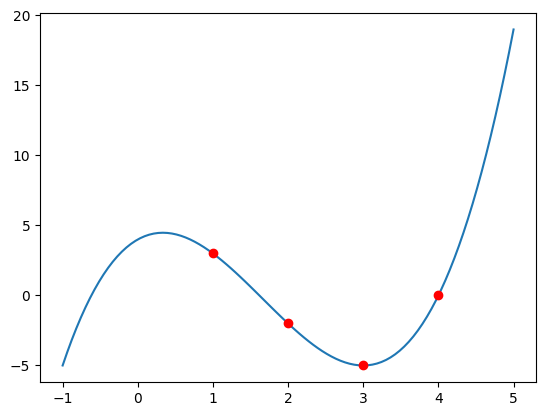

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        L[i][i] = 1
        for j in range(i, n):
            U[i][j] = A[i][j]
            for k in range(i):
                U[i][j] -= L[i][k] * U[k][j]
        for j in range(i + 1, n):
            L[j][i] = A[j][i]
            for k in range(i):
                L[j][i] -= L[j][k] * U[k][i]
            L[j][i] /= U[i][i]
    return L, U

def solve(L, U, b):
    n = len(L)
    y = np.zeros(n)
    x = np.zeros(n)
    # Resolvendo Ly = b
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j]
    # Resolvendo Ux = y
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= U[i][j] * x[j]
        x[i] /= U[i][i]
    return x

A = np.array([
    [1 , 1 , 1, 1],
    [8 , 4 , 2, 1],
    [27, 9 , 3, 1],
    [64, 16, 4, 1]
])

b = np.array([3, -2, -5, 0])

L, U = decomposition(A)

a, b, c, d = solve(L,U,b)

f = lambda x: a*x**3 + b*x**2 + c*x + d
print(f'F(x) = {int(a)}x^3 + {int(b)}x^2 + {int(c)}x + {int(d)}')

xi = np.linspace(-1,5,100)
plt.plot(xi,f(xi),[1,2,3,4],[3,-2,-5,0],'ro')
plt.show()

**Questão 4:**

Em muitas aplicações é necessário encontrar uma função que representa um conjunto de dados obtidos experimentalmente. Podemos encontrar o polinômio de grau 3 que melhor representa um conjunto de 10 pontos $(x_i, y_i)$, $i=1,2,...,10$ resolvendo o sistema linear 

$$(Z^TZ)a = Z^Ty$$

onde $Z$ é a matriz $10\times4$ obtida a partir dos valores de $x_i$, $i=1,2,...,10$ fazendo

$$Z = \left[\begin{matrix}
1 & x_1 & x_1^2 & x_1^3\\
1 & x_2 & x_2^2 & x_2^3\\
1 & x_3 & x_3^2 & x_3^3\\
\vdots & \vdots & \vdots & \vdots\\
1 & x_{10} & x_{10}^2 & x_{10}^3\\
\end{matrix}\right]$$

$a$ é a matriz dos coeficientes do polinômio $a=[a_0, a_1, a_2,a_3]^T$ e $y$ é dado por $y=[y_1,y_2,...,y_{10}]^T$. 

Monte e resolva o sistema para encontrar o polinômio, então, plote o gráfico desse polinômio juntamente com os pontos: $(1.3,1.9)$, $(0.9,3.01)$, $(2.2,-2.1)$, $(1.95,-1.98)$, $(1.78,-1.53)$, $(3.1,-5.01)$, $(2.48,-4.91)$, $(2.74,-5.01)$, $(3.35,-4.02)$ e $(3.99,0.15)$

F(x) = 1.042x^3 + -5.218x^2 + 3.406x + 3.578


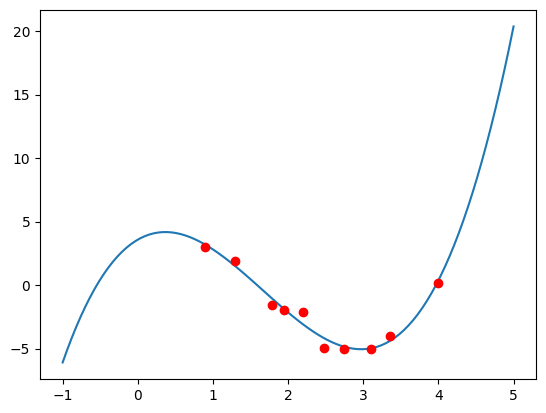

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        L[i][i] = 1
        for j in range(i, n):
            U[i][j] = A[i][j]
            for k in range(i):
                U[i][j] -= L[i][k] * U[k][j]
        for j in range(i + 1, n):
            L[j][i] = A[j][i]
            for k in range(i):
                L[j][i] -= L[j][k] * U[k][i]
            L[j][i] /= U[i][i]
    return L, U

def solve(L, U, b):
    n = len(L)
    y = np.zeros(n)
    x = np.zeros(n)
    # Resolvendo Ly = b
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j]
    # Resolvendo Ux = y
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= U[i][j] * x[j]
        x[i] /= U[i][i]
    return x

x = [1.3, 0.9, 2.2, 1.95, 1.78, 3.1, 2.48, 2.74, 3.35, 3.99]
y = [1.9,3.01,-2.1,-1.98,-1.53,-5.01,-4.91,-5.01,-4.02,0.15]

A = np.array([
    [1, x[0] , x[0]**2, x[0]**3],
    [1, x[1] , x[1]**2, x[1]**3],
    [1, x[2] , x[2]**2, x[2]**3],
    [1, x[3] , x[3]**2, x[3]**3],
    [1, x[4] , x[4]**2, x[4]**3],
    [1, x[5] , x[5]**2, x[5]**3],
    [1, x[6] , x[6]**2, x[6]**3],
    [1, x[7] , x[7]**2, x[7]**3],
    [1, x[8] , x[8]**2, x[8]**3],
    [1, x[9] , x[9]**2, x[9]**3]
])

B = np.transpose(A)   #Transposta
System = np.dot(B, A) #Multiplicação entre as matrizes para encontrar o sistema 4x4
b = np.dot(B,y)       #Transposta multiplicada pelo vetor resposta de A

L, U = decomposition(System)

d,c,b,a = solve(L,U,b)

f = lambda x: a*x**3 + b*x**2 + c*x + d
print(f'F(x) = {round(a,3)}x^3 + {round(b,3)}x^2 + {round(c,3)}x + {round(d,3)}')

xi = np.linspace(-1,5,100)
plt.plot(xi,f(xi))
plt.plot(x,y,'ro')
plt.show()

**Questão 5:** 

A figura abaixo mostra o corte de uma aleta retangular (seção transversal constante) de comprimento $L = 0,3$ m e espessura $t = 0,01$ m, que está discretizada com $n + 1$ nós equidistantes ($\Delta x=L/n$). O coeficiente de transferência de calor por convecção $h$ é constante. A temperatura de um nó interno, $T_i$, está relacionada com as temperaturas dos nós adjacentes da seguinte maneira:

$$
T_{i-1}-\left\{2+(m \Delta x)^2\right\} T_i+T_{i+1}+(m \Delta x)^2 T_{\infty}=0
$$

em que $ m^2=\frac{h p}{k A_c}$ e $p$ é o perímetro da seção transversal $A_c$. A equação adequada para o nó $n+1$ é dada por:

$$
T_n-\left\{\frac{h \Delta x}{k}+1+\frac{1}{2}(m \Delta x)^2\right\} T_{n+1}+\left\{\frac{h \Delta x}{k}+\frac{1}{2}(m \Delta x)^2\right\} T_{\infty}=0
$$

Para uma situação de convecção natural circundando a aleta, use $h=5 \mathrm{~W} \mathrm{~m}^{-2} \mathrm{~K}^{-1}$. O material da aleta é o alumínio, portanto, apresentando	$k=100 \mathrm{~W} \mathrm{~m}^{-1} \mathrm{~K}^{-1}$. A temperatura da base é $T_b=373,15 \mathrm{~K}$ e a temperatura do ambiente circundante é	$T_{\infty}=298,15 \mathrm{~K}$. Utilizando $n = 10$, monte o sistema de equações lineares para as temperaturas ao longo da aleta e obtenha a solução usando um dos métodos estudados.
Apresente a resposta na forma de uma tabela e de um gráfico. 

<img src="aleta.png" width="500">



Matriz:
 [[-2.0149  1.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 1.     -2.0149  1.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      1.     -2.0149  1.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      1.     -2.0149  1.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      1.     -2.0149  1.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      1.     -2.0149  1.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      1.     -2.0149  1.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.     -2.0149  1.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      1.0088 -1.0326]]
Solução:
 [373.1 366.  359.8 354.6 350.2 346.6 343.7 341.4 339.9 338.9 338.5]

Tabela de Dados:
Temperatura 0     373.15°
Temperatura 1     365.986°
Temperatura 2     359.831°
Temperatura 3     354.593°
Temperatura 4     350.195°
Temperatura 5     346.572°
Temperatura 6     343.668°
Temperatura 7     341.442°
Temp

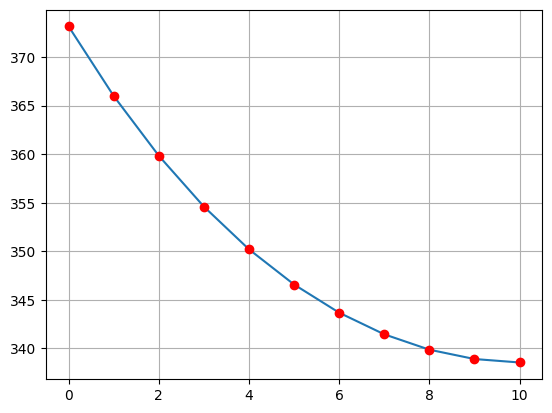

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        L[i][i] = 1
        for j in range(i, n):
            U[i][j] = A[i][j]
            for k in range(i):
                U[i][j] -= L[i][k] * U[k][j]
        for j in range(i + 1, n):
            L[j][i] = A[j][i]
            for k in range(i):
                L[j][i] -= L[j][k] * U[k][i]
            L[j][i] /= U[i][i]
    return L, U

def solveLU(L, U, b):
    n = len(L)
    y = np.zeros(n)
    x = np.zeros(n)
    # Resolvendo Ly = b
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j]
    # Resolvendo Ux = y
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= U[i][j] * x[j]
        x[i] /= U[i][i]
    return x

def constantes():
    L=0.3
    n=11
    X=L/n
    Tinf=298.15
    t1=373.15
    t=0.01
    k=100.0
    h=5
    Ac=0.01*0.01
    p=4*0.01
    m2=(h*p)/(k*Ac)
    c1=(m2*((X)**2)+2)
    c2=m2*((X)**2)*Tinf
    c4=(h*X)/k+1+0.5*(m2*(X**2))
    c3=((h*X)/k+0.5*(m2*(X**2)))*Tinf
    return c1,c2,c3,c4,t1,Tinf

c1,c2,c3,c4,t1,tinf=constantes()

A = np.array([
    [-c1 , 1 , 0, 0, 0, 0, 0, 0, 0],
    [1 , -c1 , 1, 0, 0, 0, 0, 0, 0],
    [0 , 1 , -c1, 1, 0, 0, 0, 0, 0],
    [0 , 0 , 1, -c1, 1, 0, 0, 0, 0],
    [0 , 0 , 0, 1, -c1, 1, 0, 0, 0],
    [0 , 0 , 0, 0, 1, -c1, 1, 0, 0],
    [0 , 0 , 0, 0, 0, 1, -c1, 1, 0],
    [0 , 0 , 0, 0, 0, 0, 1, -c1, 1],
    [0 , 0 , 0, 0, 0, 0, 0, c4, -c1*c4+1],
])
b = np.array([-c2-t1,-c2,-c2,-c2,-c2,-c2,-c2,-c2,-c2*c4-c3])
L, U = decomposition(A)
resp = solveLU(L,U,b)
resp = np.insert(resp,0,t1) #t1
resp = np.append(resp,(resp[9]+c3)/c4) #t11

np.set_printoptions(precision=4)
print("Matriz:\n",A)
np.set_printoptions(precision=1)
print("Solução:\n",resp)

x = [0,1,2,3,4,5,6,7,8,9,10]

# Imprima a tabela
table_data = list(zip(x, resp))
print("\nTabela de Dados:")
for row in table_data:
    print("Temperatura {:<5} {:2}°".format(row[0], round(row[1],3)))

plt.plot(x,resp,x,resp,'ro')
plt.grid()
plt.show()
